In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [11]:
# I added this code to check the count of data points after confirming it in my resource csv file. Count of 2230 is correct.
session.query(func.count(Measurement.date).\
              filter(Measurement.date >= dt.date(2016, 8, 23))).all()

[(2230)]

In [12]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= dt.date(2016, 8, 23)).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
climate_df = pd.DataFrame(results, columns=['date', 'prcp'])
climate_df.set_index('date', inplace=True )
climate_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [14]:
# Sort the dataframe by date
climate_df_new = climate_df.sort_values("date")

Text(0, 0.5, 'Inches')

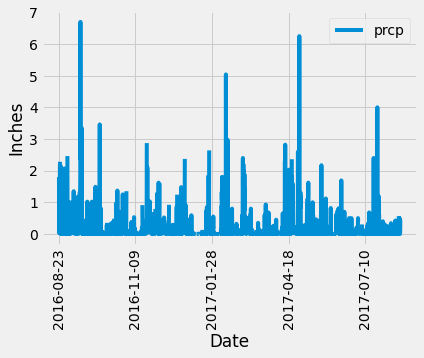

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
climate_df_new.plot(rot = 90)
plt.xlabel('Date')
plt.ylabel('Inches')


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
climate_df_new.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
station = session.query(Station.station).count()
print(f"There are {station} stations available in this dataset")

There are 9 stations available in this dataset


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.tobs).desc()).all()
active_stations_df = pd.DataFrame(active_stations, columns=['station', 'observations'])

active_stations_df

,station,observations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs) ).\
filter(Measurement.station == ('USC00519281')).all()


[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == ('USC00519281')).all()
#print(temp)

Text(0, 0.5, 'Frequentcy')

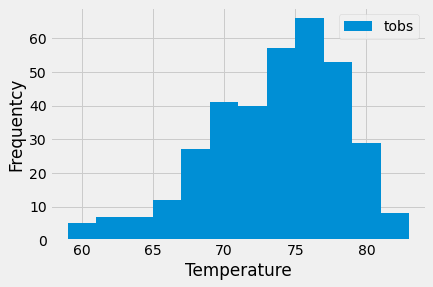

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_results = session.query(Measurement.tobs).\
    filter(Measurement.date >= dt.date(2016, 8, 23)).\
    filter(Measurement.station == ('USC00519281')).all()
#print(temp_results)
           
           
temp_df = pd.DataFrame(temp_results, columns=['tobs'])
temp_df
           
temp_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequentcy')

## Bonus Challenge Assignment

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.date(2017, 5, 22)
end_date = dt.date(2017, 5, 22) + dt.timedelta(days=8)
tmin, tavg, tmax = calc_temps(start_date,end_date)[0]

tmin, tavg, tmax

(69.0, 75.28846153846153, 87.0)

C:\Users\Stagner\anaconda3\envs\bcs\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


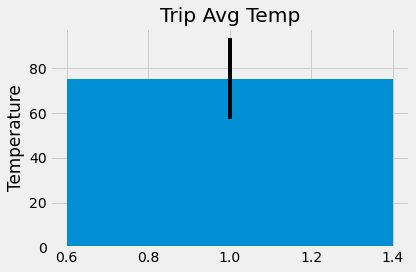

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
height = 1
yerr = tmax - tmin
bar = ax.bar(height, tavg, yerr=yerr)
plt.title('Trip Avg Temp')
plt.ylabel('Temperature')
fig.tight_layout()
fig.show()


In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = dt.date(2017, 5, 22)
end_date = dt.date(2017, 5, 22) + dt.timedelta(days=8)
session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
filter(Measurement.date >= start_date).\
filter(Measurement.date <= end_date).\
filter(Measurement.station == Station.station).\
group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  4.29),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2.22),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.5),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  1.2700000000000002),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.65),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.34)]

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("05-23")

[(68.0, 74.94827586206897, 87.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
start_date = dt.date(2017, 5, 22)
end_date = dt.date(2017, 5, 22) + dt.timedelta(days=8)

# Use the start and end date to create a range of dates
dates = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()
trip_dates = [x[0] for x in dates]

# Stip off the year and save a list of %m-%d strings with another list comprehension 
trip_dates_snip= [x[5:] for x in trip_dates]

# Find the start month/day and the end month/day 
start_month_day = trip_dates_snip[0]
end_month_day = trip_dates_snip[-1]

# Loop through the list of %m-%d strings and calculate the normals for each date    
normals = [session.query(Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
           filter(func.strftime("%m-%d", Measurement.date) >= start_month_day).\
           filter(func.strftime("%m-%d", Measurement.date) <= end_month_day).\
           group_by(func.strftime("%m-%d", Measurement.date)).all()]


normals = normals[0]
print("Daily Normals for 05-22 to 05-30")
normals

Daily Normals for 05-22 to 05-30


[('2014-05-22', 64.0, 74.45614035087719, 80.0),
 ('2017-05-23', 68.0, 74.94827586206897, 87.0),
 ('2013-05-24', 67.0, 73.94827586206897, 79.0),
 ('2011-05-25', 68.0, 74.27586206896552, 79.0),
 ('2013-05-26', 65.0, 74.03636363636363, 82.0),
 ('2010-05-27', 65.0, 74.49090909090908, 80.0),
 ('2017-05-28', 67.0, 74.27777777777777, 82.0),
 ('2017-05-29', 64.0, 74.19607843137256, 80.0),
 ('2017-05-30', 69.0, 74.33333333333333, 81.0)]

In [28]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
#                 group_by(Measurement.station).\
#                 order_by(func.count(Measurement.tobs).desc()).all()
normals_df = pd.DataFrame(normals, columns=['date', 'avg min', 'avg avg', 'avg max'])

normals_df

,date,avg min,avg avg,avg max
0,2014-05-22,64.0,74.456140,80.0
1,2017-05-23,68.0,74.948276,87.0
2,2013-05-24,67.0,73.948276,79.0
3,2011-05-25,68.0,74.275862,79.0
4,2013-05-26,65.0,74.036364,82.0
5,2010-05-27,65.0,74.490909,80.0
6,2017-05-28,67.0,74.277778,82.0
7,2017-05-29,64.0,74.196078,80.0
8,2017-05-30,69.0,74.333333,81.0


Text(0, 0.5, 'Temperature')

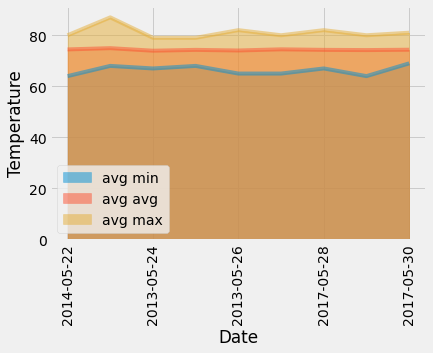

In [29]:
# Plot the daily normals as an area plot with `stacked=False`
ax = normals_df.plot.area(stacked=False, x= 'date', rot = 90)
#plt.tic('date')
plt.xlabel('Date')
plt.ylabel('Temperature')